# Set UP Modules

In [2]:
import os
os.chdir('/home/tzd/fs03/d1/tzd/Data_analysis/RAworkflow')
%run ./My_Modules/DataSetUP10VAR.ipynb
#FmodelDF
# getNoASGM():       => Hg0no_ASGM dataframe; in correct units
# get_model(region): => Hg0_modified; in correct units (takes gridbox region in Peru as input)
# getLoRes():        => Hg0 baseline with ASGM low resulution in correct units
# getHiRes():        => Hg0 baseline with ASGM high resulution in correct units  
# getNoASGM():       => Hg0 baseline without ASGM low resulution in correct units  
# get_obs_d():       => obs_Hg0; original observations daily mean values
# get_detrended_obs(): => Obs_detrended; return detrended observations
# get_detrended_model(model): => This function takes in a dataframe of model outputs and returns the detrended version of that model output
# getIQR_Dd(model): This function takes in a dataframe of model outputs and returns the detrended IQR 
# getIQR(model): => This function takes in a dataframe of model outputs and returns the IQR

boxes().shape[0]
# getNoASGM():       => Hg0no_ASGM dataframe; in correct units
# get_model(region): => Hg0_modified; in correct units (takes gridbox region in Peru as input)
# getLoRes():        => Hg0 baseline with ASGM low resulution in correct units
# getHiRes():        => Hg0 baseline with ASGM high resulution in correct units
# getNoASGM():       => Hg0 baseline without ASGM low resulution in correct units
# get_obs_d():       => obs_Hg0; original observations daily mean values
# get_detrended_obs(): => Obs_detrended; return detrended observations
# get_detrended_model(model): => This function takes in a dataframe of model outputs 
                                and returns the detrended version of that model output
# getObsIQR(obs): This function takes observations and returns the IQR 
# getIQR_Dd(model): This function takes in a dataframe of model outputs and returns the detrended IQR
# getIQR(model): => This function takes in a dataframe of model outputs and returns the IQR
#

/home/tzd/anaconda3/envs/Jlab/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [3]:

from matplotlib.ticker import ScalarFormatter,AutoMinorLocator
import matplotlib as mpl
plt.style.use(
    "https://github.com/aeturrell/coding-for-economists/raw/main/plot_style.txt"
)
mpl.rcParams.update({"lines.linewidth": 1.2})
# Set max rows displayed for readability
pd.set_option("display.max_rows", 8)
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.seasonal import seasonal_decompose

# Characteristics Time Series

## Characteristics of Observation Time Series

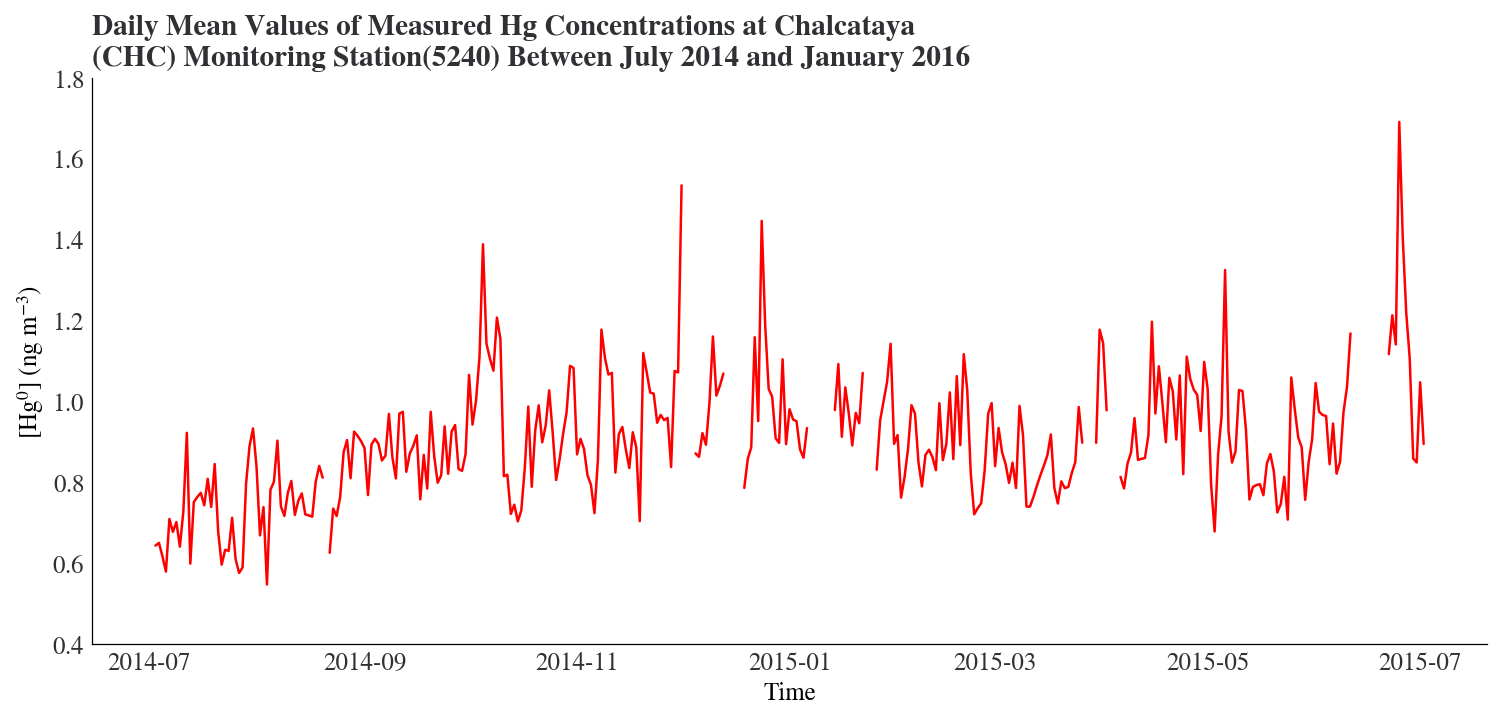

In [4]:
fig= plt.figure( figsize=[12,5])
ax= fig.add_subplot(111)
Title='Daily Mean Values of Measured Hg Concentrations at Chalcataya \n(CHC) Monitoring Station(5240) Between July 2014 and January 2016'
Y_label='[Hg$^0$] (ng m$^{-3}$)'
X_label= 'Time'
plt_data=get_obs_d().value

ax.plot(plt_data,color = 'red',label = 'Observations')
ax.set_title(Title, size=14,fontweight="bold")
plt.ylabel(Y_label)
plt.xlabel(X_label)
# plt.legend()
plt.show()

A.M. Koenig et al. assert that the last 9 months of the measurement period was affected by ENSO hence 

In [5]:
#observations under normal conditions
obs_nc=get_obs_d()[:'2015-07-03']

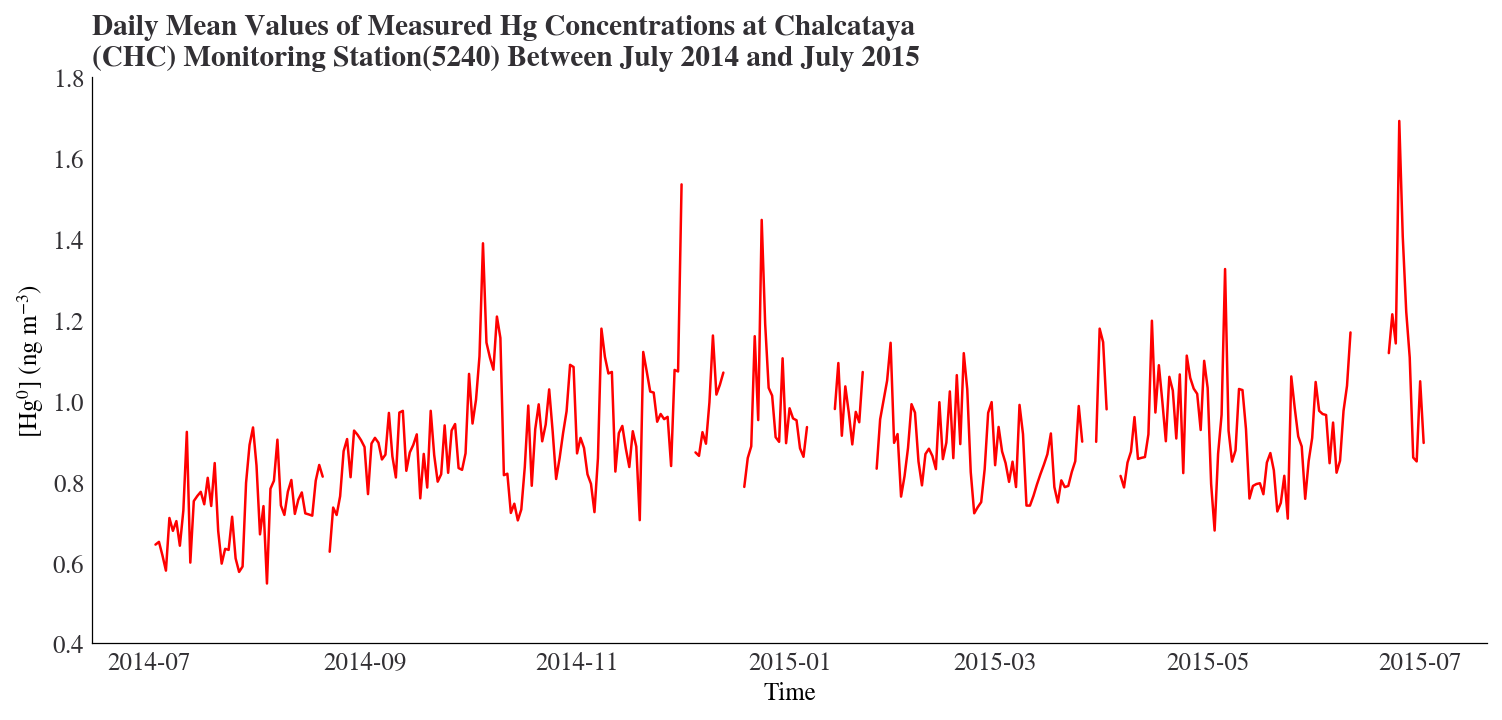

In [6]:
fig= plt.figure( figsize=[12,5])
ax= fig.add_subplot(111)
Title='Daily Mean Values of Measured Hg Concentrations at Chalcataya \n(CHC) Monitoring Station(5240) Between July 2014 and July 2015'
Y_label='[Hg$^0$] (ng m$^{-3}$)'
X_label= 'Time'
plt_data=obs_nc.value

ax.plot(plt_data,color = 'red',label = 'Observations')
ax.set_title(Title, size=14,fontweight="bold")
plt.ylabel(Y_label)
plt.xlabel(X_label)
# plt.legend()
plt.show()

Based on the trend plot in the figure above, there appears to be an overall upwards trend in the observed mercury concentration over the two years in which the data was recorded

We can see that there is definite seasonality in the data, causing prices to fluctuate by 0.2 over the course of a month.

The residual plot show us that there is randomness in the observed concentration of Hg in the atmosphere

Next we weill create the same plot for the model output tio figure out if GEOS Chem captures all these characteristic of the observed data


## Characteristics of Model Time Series

In [7]:
GCno_asgm=getNoASGM()[:'2015-07-03']
GC_asgm=getLoRes()[:'2015-07-03']

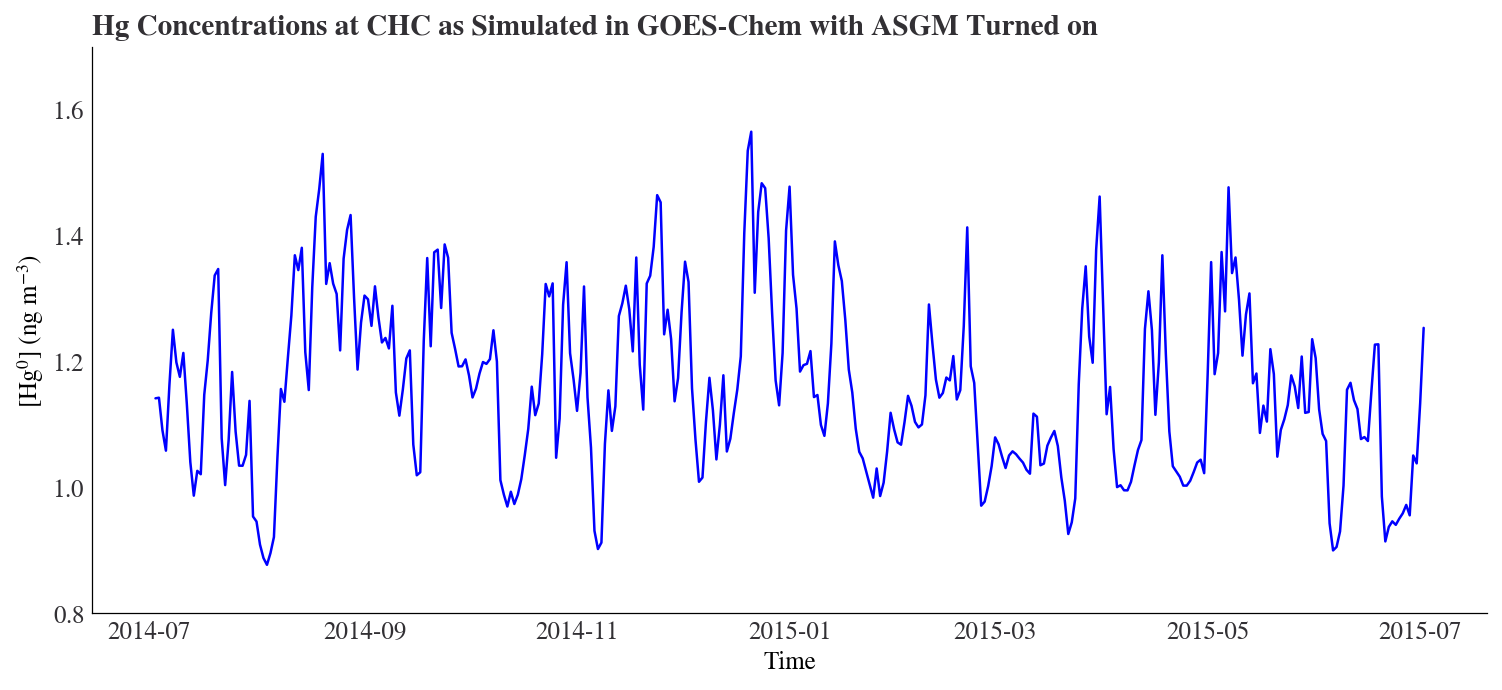

In [8]:
fig= plt.figure( figsize=[12,5])
ax= fig.add_subplot(111)
Title='Hg Concentrations at CHC as Simulated in GOES-Chem with ASGM Turned on'
Y_label='[Hg$^0$] (ng m$^{-3}$)'
X_label= 'Time'
plt_data=GC_asgm.SpeciesConc_Hg0

ax.plot(plt_data,color = 'blue',label = 'Reference Simulation \nwith ASGM Turned on')
ax.set_title(Title, size=14,fontweight="bold")
plt.ylabel(Y_label)
plt.xlabel(X_label)
#plt.legend()
plt.show()

Based on the trend plot in the figure above, there appears to be no overall upwards or downward trend in the modelled mercury concentration over the two years simulated in GEOS Chem

We can see that there is definite seasonality in the data, causing prices to fluctuate by 0.125 over the course of a month.

The residual plot shows us that there is randomness in the modelled concentration of Hg in the atmosphere

Next we weill create the same plot for the model output tio figure out if GEOS Chem captures all these characteristic of the observed data

# Comparison of Time Series

## Plot of time series before detrending 

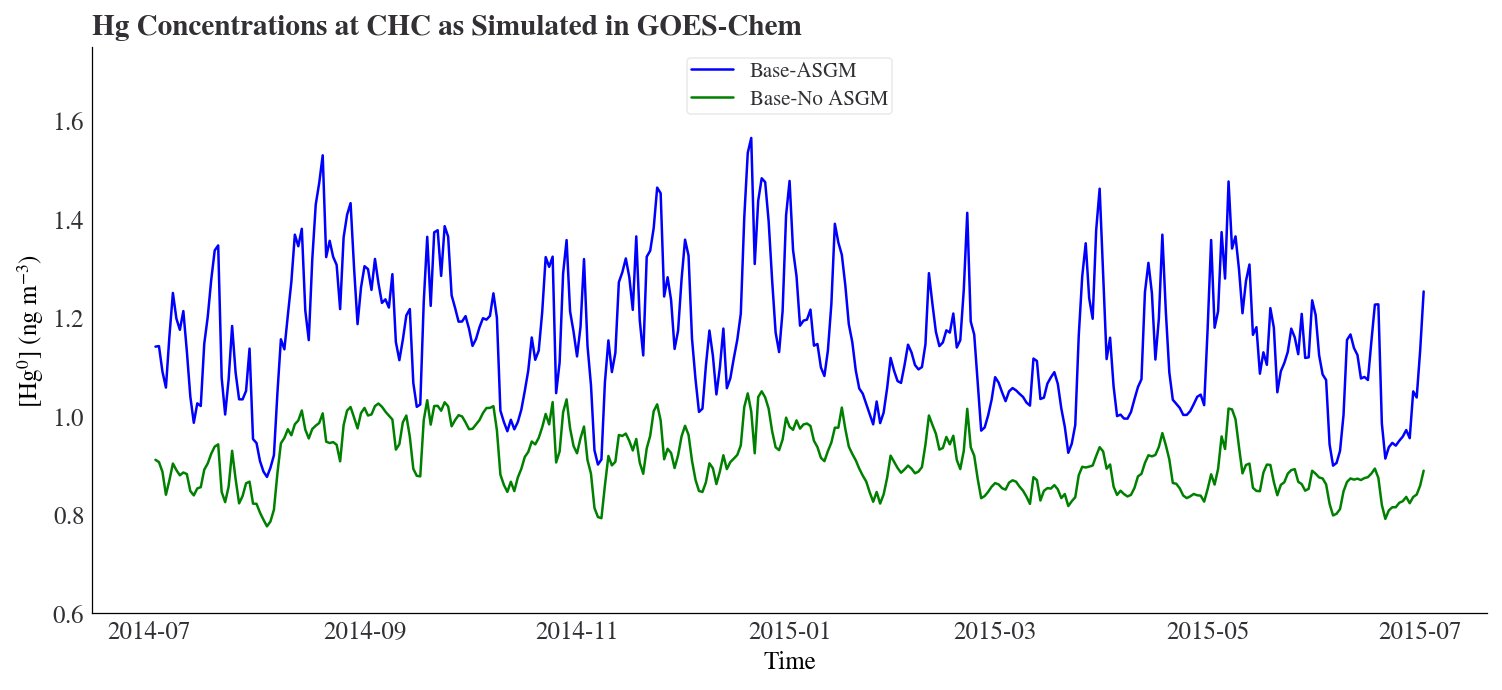

In [9]:
#Set Up figure
fig= plt.figure( figsize=[12,5])
ax= fig.add_subplot(111)

#define labels
Title='Hg Concentrations at CHC as Simulated in GOES-Chem'
Y_label='[Hg$^0$] (ng m$^{-3}$)'
X_label= 'Time'

#define data
plt_data1=GCno_asgm.SpeciesConc_Hg0
plt_data2=GC_asgm.SpeciesConc_Hg0

#Plots
ax.plot(plt_data2,color = 'blue',label = 'Base-ASGM')
ax.plot(plt_data1,color = 'green',label = 'Base-No ASGM')
#Turn on labels 
ax.set_title(Title, size=14,fontweight="bold")
plt.ylabel(Y_label)
plt.xlabel(X_label)
plt.legend(loc=9)
plt.ylim(0.6, 1.75)
plt.show()
#fig.savefig('MCMC_Refactored_Notebooks/MIT_TPP_thesis/figures/ModelvsObs/GC_base_ASGMvNoASGM.png')
#fs03/d1/tzd/Data_analysis/RAworkflow/MCMC_Refactored_Notebooks/MIT_TPP_thesis/figures/ModelvsObs/ModelvsObs_v1.png

In [10]:
# #Set Up figure
# fig= plt.figure( figsize=[12,5])
# ax= fig.add_subplot(111)

# #define labels
# Title='Hg Concentrations at CHC as Simulated in GOES-Chem'
# Y_label='[Hg$^0$] (ng m$^{-3}$)'
# X_label= 'Time'

# #define data
# plt_data1=GCno_asgm.SpeciesConc_Hg0
# plt_data2=obs.value
# #Plots
# ax.plot(plt_data2,color = 'red',label = 'Observations')
# ax.plot(plt_data1,color = 'green',label = 'Base No ASGM')
# #Turn on labels 
# ax.set_title(Title, size=14,fontweight="bold")
# plt.ylabel(Y_label)
# plt.xlabel(X_label)
# plt.legend(loc=9)
# plt.ylim(0.6, 1.75)
# plt.show()
# #fig.savefig('MCMC_Refactored_Notebooks/MIT_TPP_thesis/figures/ModelvsObs/GC_base_ObsvNoASGMv1.png')

According to the plot above we can tell that GEOS-Chem attributes the Hg concentration at Chalcataya to ASGM emissions.

Consequently, we can conclude that the model asserts that the Hg concentration in the atmosphere at Chalcataya is mostly due to Hg emissions from ASGM activities in the surrounding reagion. if we trust the GEOS-Chem models prediction of the Hg concentrations, we may use it to explaint he observed concentrations in the atmosphere. 

## How do the observed concentrations in the Atmosphere compare with the modeled Hg concentrations

In [11]:
obsNC=obs_nc
GC_asgmNC=GC_asgm

### Comparison of Montlhy means

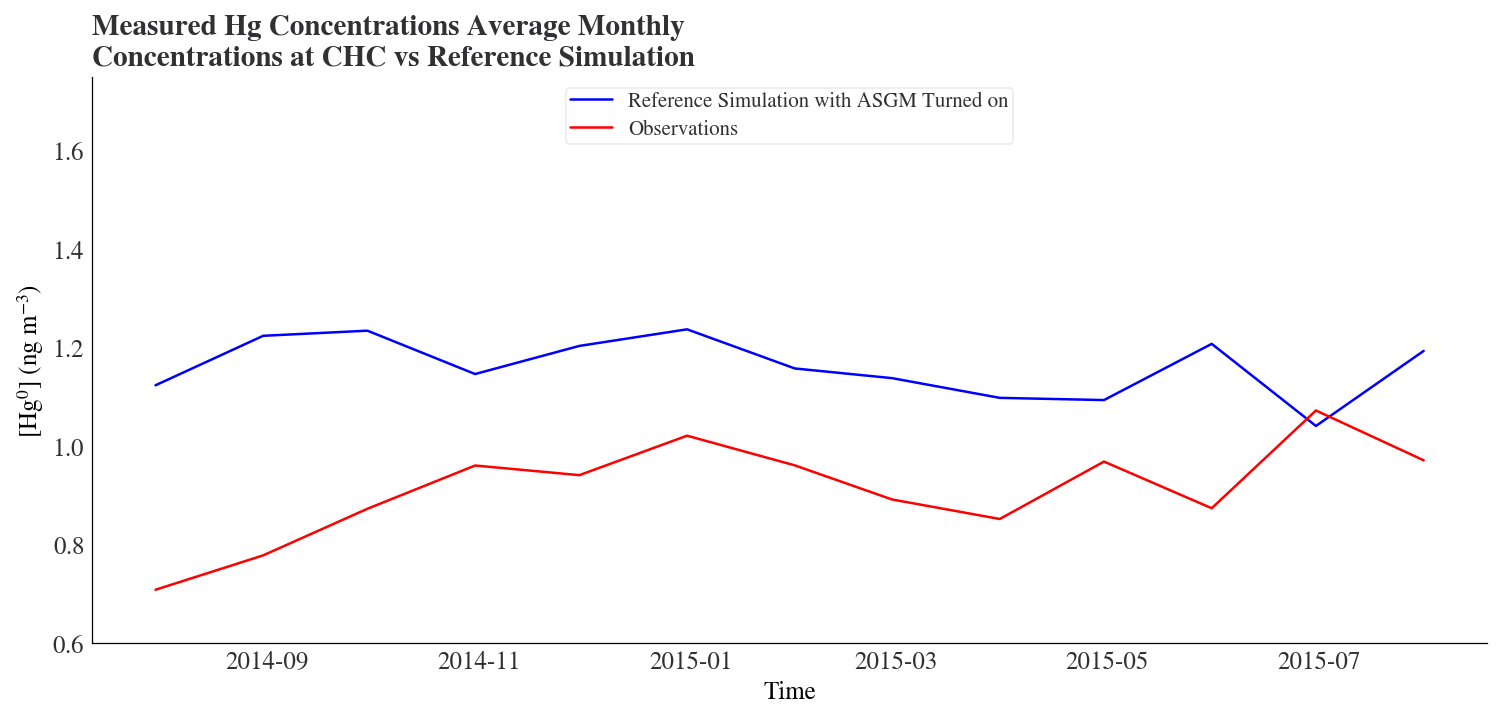

In [12]:
#Set Up figure
fig= plt.figure( figsize=[12,5])
ax= fig.add_subplot(111)

#define labels
Title='Measured Hg Concentrations Average Monthly \nConcentrations at CHC vs Reference Simulation'
Y_label='[Hg$^0$] (ng m$^{-3}$)'
X_label= 'Time'

#define data
plt_data1=obsNC.resample('M').mean()['value']
plt_data2=GC_asgmNC.resample('M').mean()['SpeciesConc_Hg0']

#Plots
ax.plot(plt_data2,color = 'blue',label = 'Reference Simulation with ASGM Turned on')
ax.plot(plt_data1,color = 'red',label = 'Observations')
#Turn on labels 
ax.set_title(Title, size=14,fontweight="bold")
plt.ylabel(Y_label)
plt.xlabel(X_label)
plt.legend(loc=9)
plt.ylim(0.6, 1.75)
plt.show()

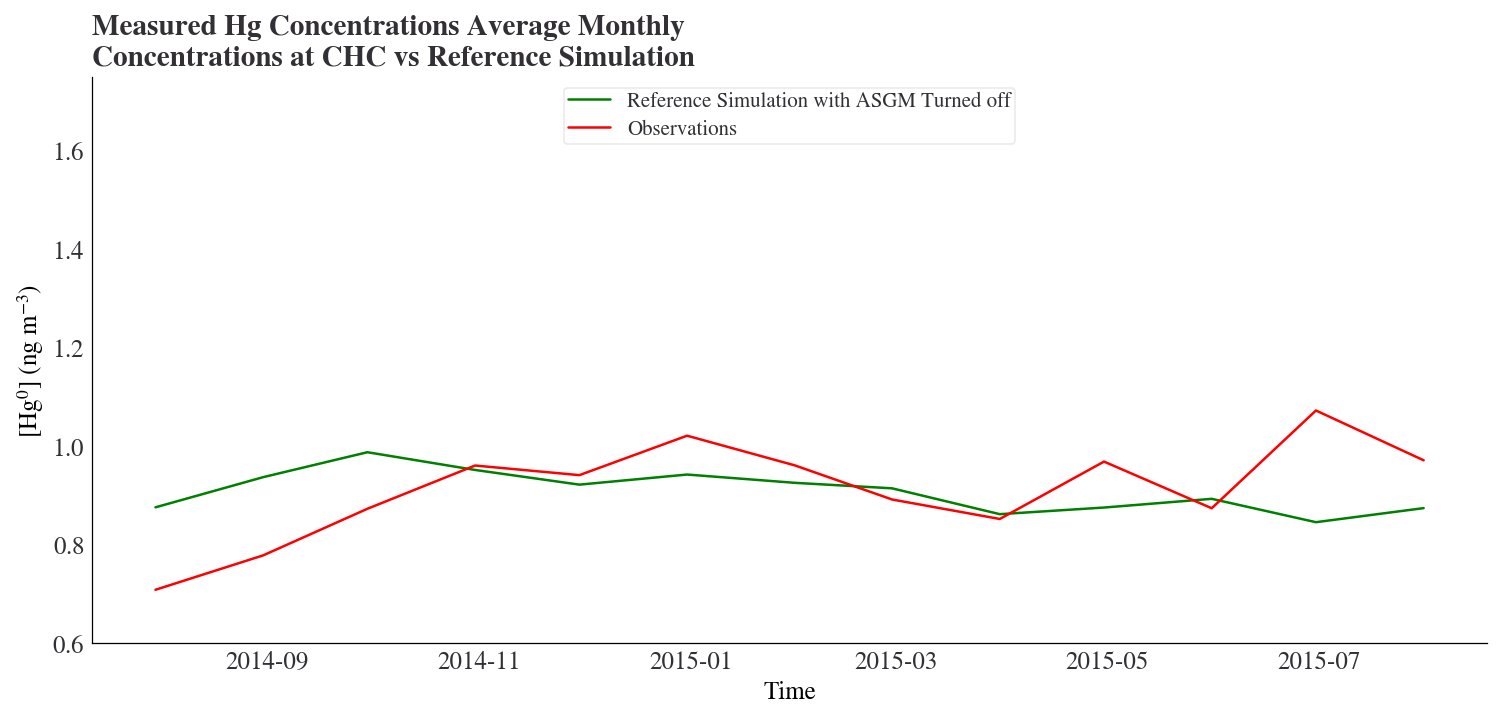

In [13]:
#Set Up figure
fig= plt.figure( figsize=[12,5])
ax= fig.add_subplot(111)

#define labels
Title='Measured Hg Concentrations Average Monthly \nConcentrations at CHC vs Reference Simulation'
Y_label='[Hg$^0$] (ng m$^{-3}$)'
X_label= 'Time'

#define data
plt_data1=obsNC.resample('M').mean()['value']
plt_data2=GCno_asgm.resample('M').mean()['SpeciesConc_Hg0']

#Plots
ax.plot(plt_data2,color = 'green',label = 'Reference Simulation with ASGM Turned off')
ax.plot(plt_data1,color = 'red',label = 'Observations')
#Turn on labels 
ax.set_title(Title, size=14,fontweight="bold")
plt.ylabel(Y_label)
plt.xlabel(X_label)
plt.legend(loc=9)
plt.ylim(0.6, 1.75)
plt.show()

# Further Comparison of Time series

In [15]:
# plt.figure(figsize=(15,5))
# plt.title('Measured Hg Concentrations vs Predicted Low Resolution Hg Concentrations in GOES Chem Model')
# GC_asgm.SpeciesConc_Hg0.plot(color = 'blue',label = 'Reference Simulation with ASGM Emissions ')
# obs.value.plot(color = 'red',label = 'Observations')
# plt.legend()
# plt.ylabel('[Hg$^0$] (ng m$^{-3}$)')
# plt.xlabel('Time')
# plt.show()

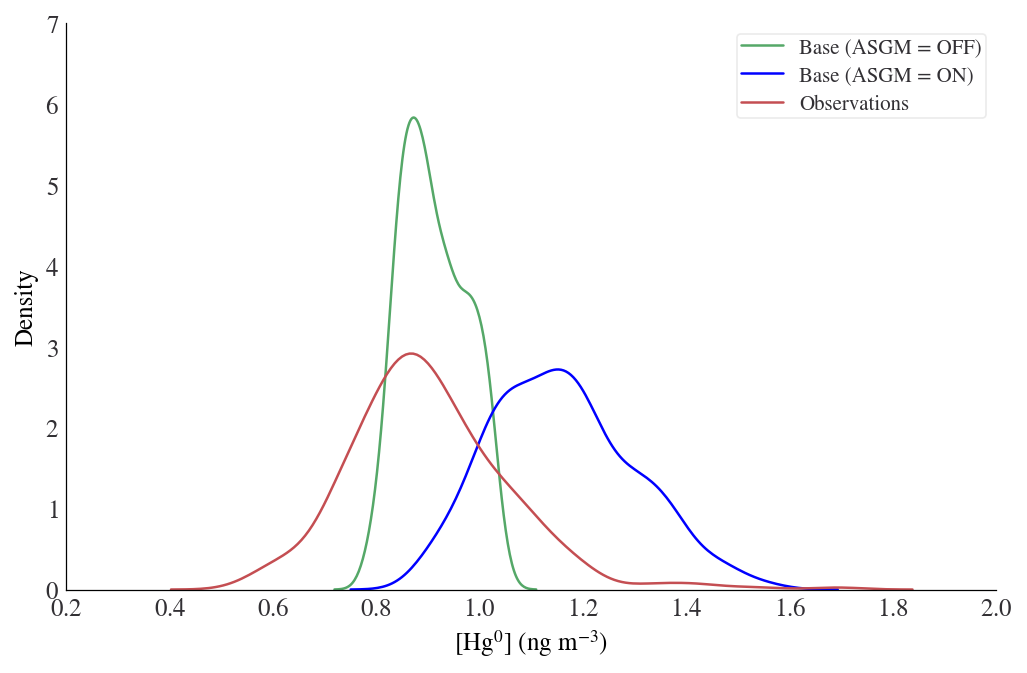

In [16]:
#GCno_asgm
fig, ax =plt.subplots(figsize=(8,5))
#plt.title('Histograms of Predicted Hg Concentrations in \nGEOS-Chem vs Observed Concentration',size=12,fontweight="bold")

sns.kdeplot(data=GCno_asgm.SpeciesConc_Hg0,ax =ax, fill=False,color = 'g',label = 'Base (ASGM = OFF)')
sns.kdeplot(data=GC_asgmNC.SpeciesConc_Hg0,ax =ax, fill=False,color = 'blue',label = 'Base (ASGM = ON)')
sns.kdeplot(data=obsNC.value,ax =ax, fill=False,color = 'r',label = 'Observations')
plt.legend()
plt.xlabel('[Hg$^0$] (ng m$^{-3}$)')
name='Histplot_obsVmodel_v1'
savepath='/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/figures/ModelvsObs/'+name+'.pdf'
fig.savefig(savepath,bbox_inches='tight')
plt.show()

## Set up defining variables

In [17]:
df_columns=['Base (ASGM = OFF)','Base (ASGM = ON)','Observations']
plot_colors={'Base (ASGM = ON)':'b','Base (ASGM = OFF)':'#329932','Observations':'#ff6961'}
df_normal_conditions=pd.DataFrame(columns=df_columns)
df_normal_conditions['Base (ASGM = OFF)']=GCno_asgm.SpeciesConc_Hg0
df_normal_conditions['Base (ASGM = ON)']=GC_asgmNC.SpeciesConc_Hg0
df_normal_conditions['Observations']=obsNC.value
df_normal_conditions

,Base (ASGM = OFF),Base (ASGM = ON),Observations
time,,,
2014-07-03,0.911956,1.141870,0.644308
2014-07-04,0.907401,1.142869,0.651114
2014-07-05,0.887611,1.091087,0.617688
2014-07-06,0.841053,1.058690,0.579989
...,...,...,...
2015-06-29,0.836476,1.050984,0.859547
2015-06-30,0.841379,1.038522,0.849968
2015-07-01,0.859729,1.134310,1.048141
2015-07-02,0.889885,1.253862,0.895688


## Create Density Plot

### Set up function for plotting density plots

In [75]:
def density_plot_compare(df,file_name,file_directory):
    plt.style.use('/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/JPnotebooks/plot_style.txt')
    plt.close('all')
    fig, ax = plt.subplots()
    for j,series in enumerate(df.columns):

        alphaVal = 0.6
        linethick = 2.5
        sns.kdeplot(df[series],ax=ax,color=plot_colors[series],label=series,alpha=alphaVal,linewidth=linethick)
                
    ax.set_xlabel('Hg$^0$ (ng m$^{-3}$)')
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.major.formatter._useMathText = True
    ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
    ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
    #ax.yaxis.set_label_coords(0.63,1.01)
    ax.yaxis.tick_left()
    #nameOfPlot = 'Histograms of Predicted Hg Concentrations in \nGEOS-Chem vs Observed Concentration'
    plt.ylabel('Density',rotation=90)
    ax.legend(frameon=False, loc='best',ncol=1,handlelength=4)
    # plt.savefig(,dpi=300)
    savepath=file_directory+file_name
    fig.savefig(savepath,bbox_inches='tight')
    plt.show()

### Plot Non-Standard Density Plot

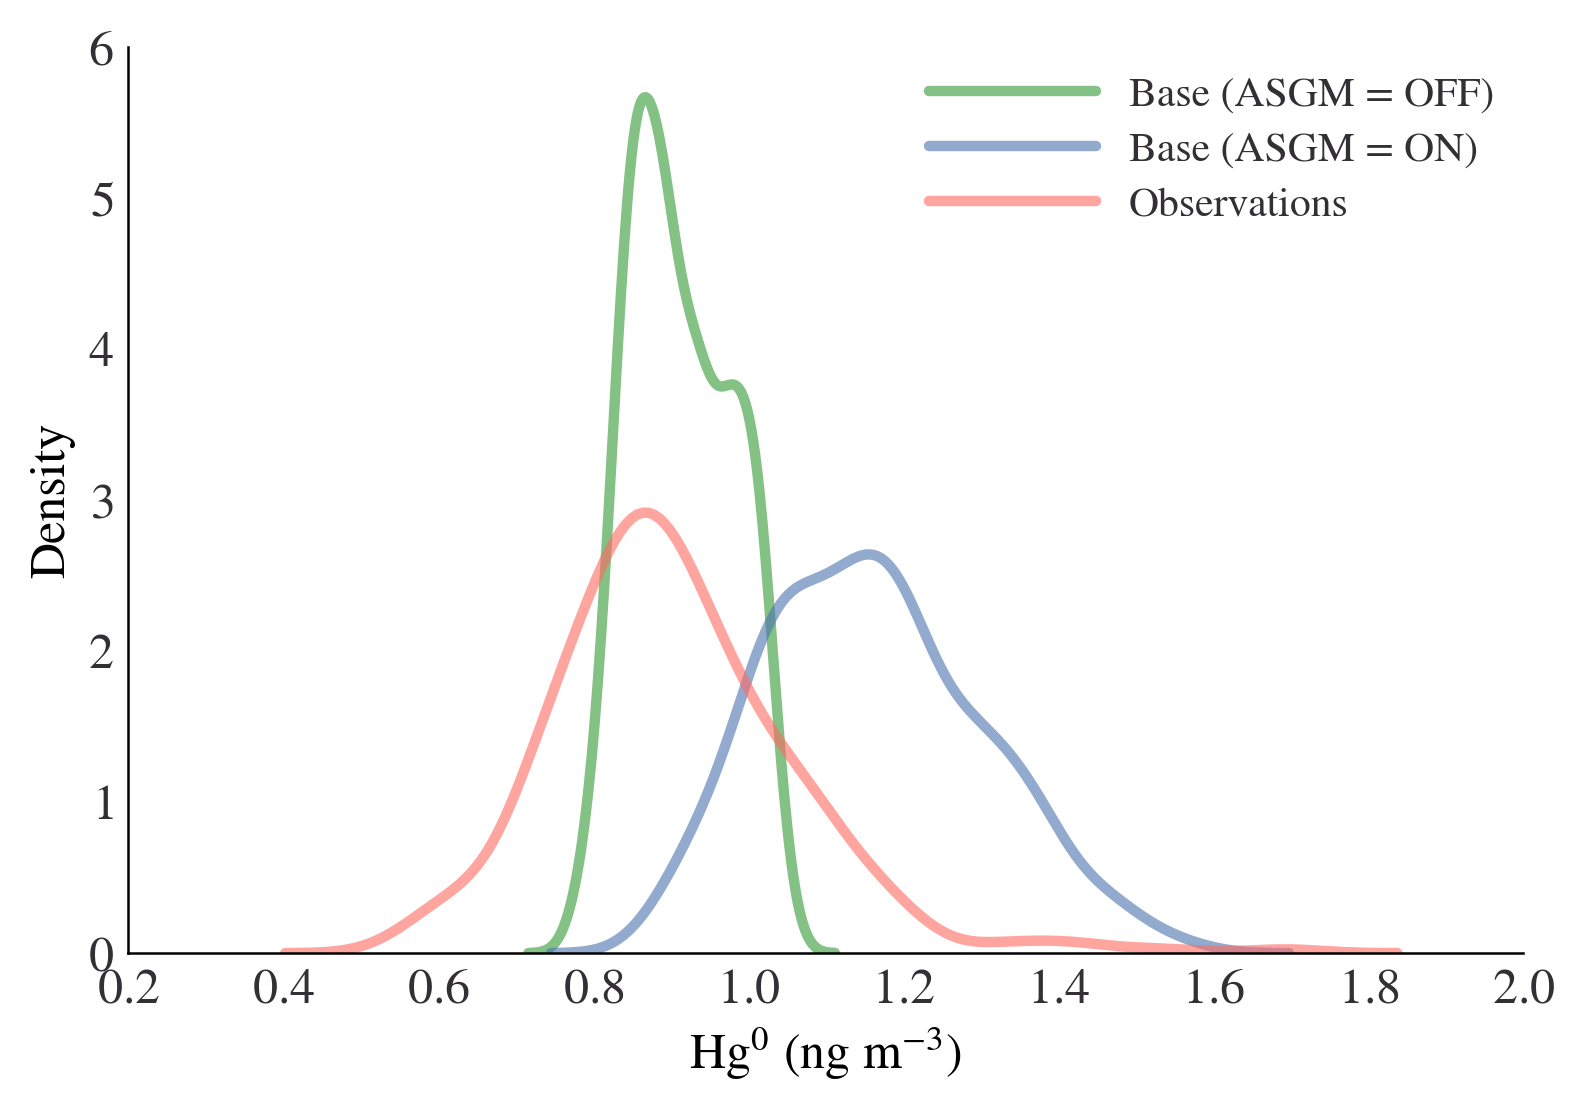

In [76]:
file_directory = '/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/figures/ModelvsObs/'
file_name = '06-12-22_models_vs_observations_density-plot.pdf'
density_plot_compare(df_normal_conditions,file_name,file_directory)

# Standardize

In [77]:
df_nc_standardized =(df_normal_conditions-df_normal_conditions.mean())
df_nc_standardized.head(3)

,Base (ASGM = OFF),Base (ASGM = ON),Observations
time,,,
2014-07-03,-0.001151,-0.020672,-0.257694
2014-07-04,-0.005706,-0.019673,-0.250888
2014-07-05,-0.025496,-0.071455,-0.284314


### Plot Standardized densityplot

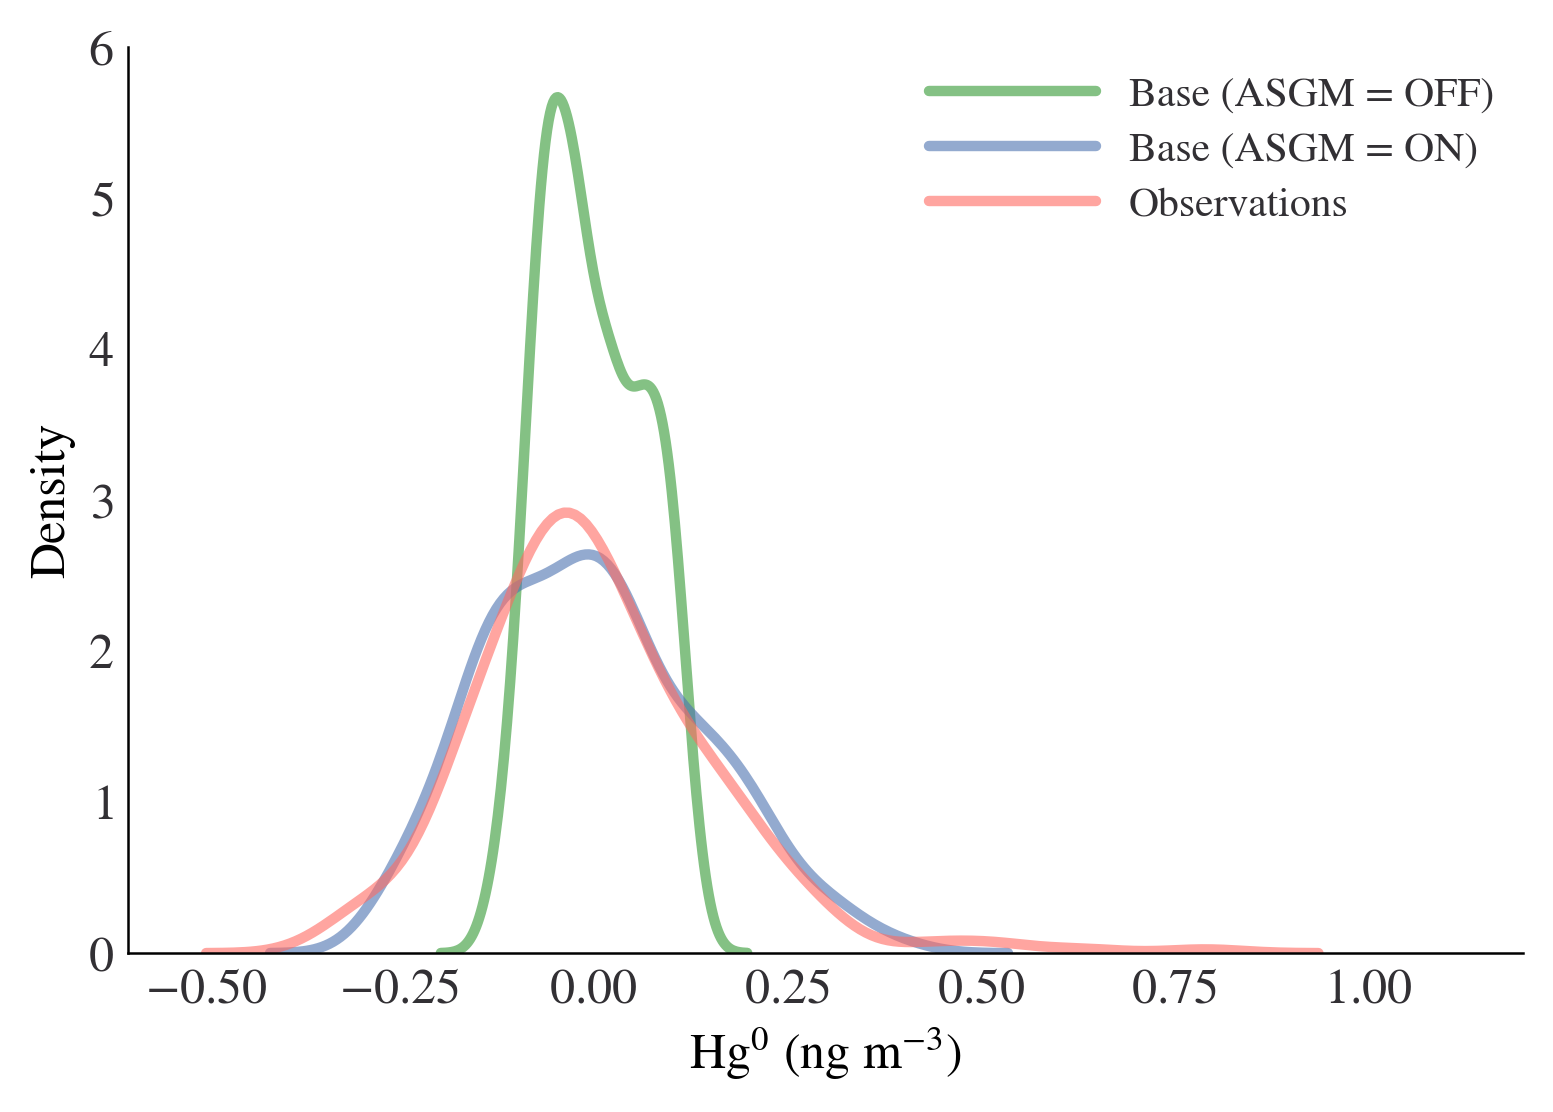

In [78]:
file_directory = '/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/figures/ModelvsObs/'
file_name = '06-12-22_models_vs_observations_density-plot_std.pdf'
density_plot_compare(df_nc_standardized,file_name,file_directory)

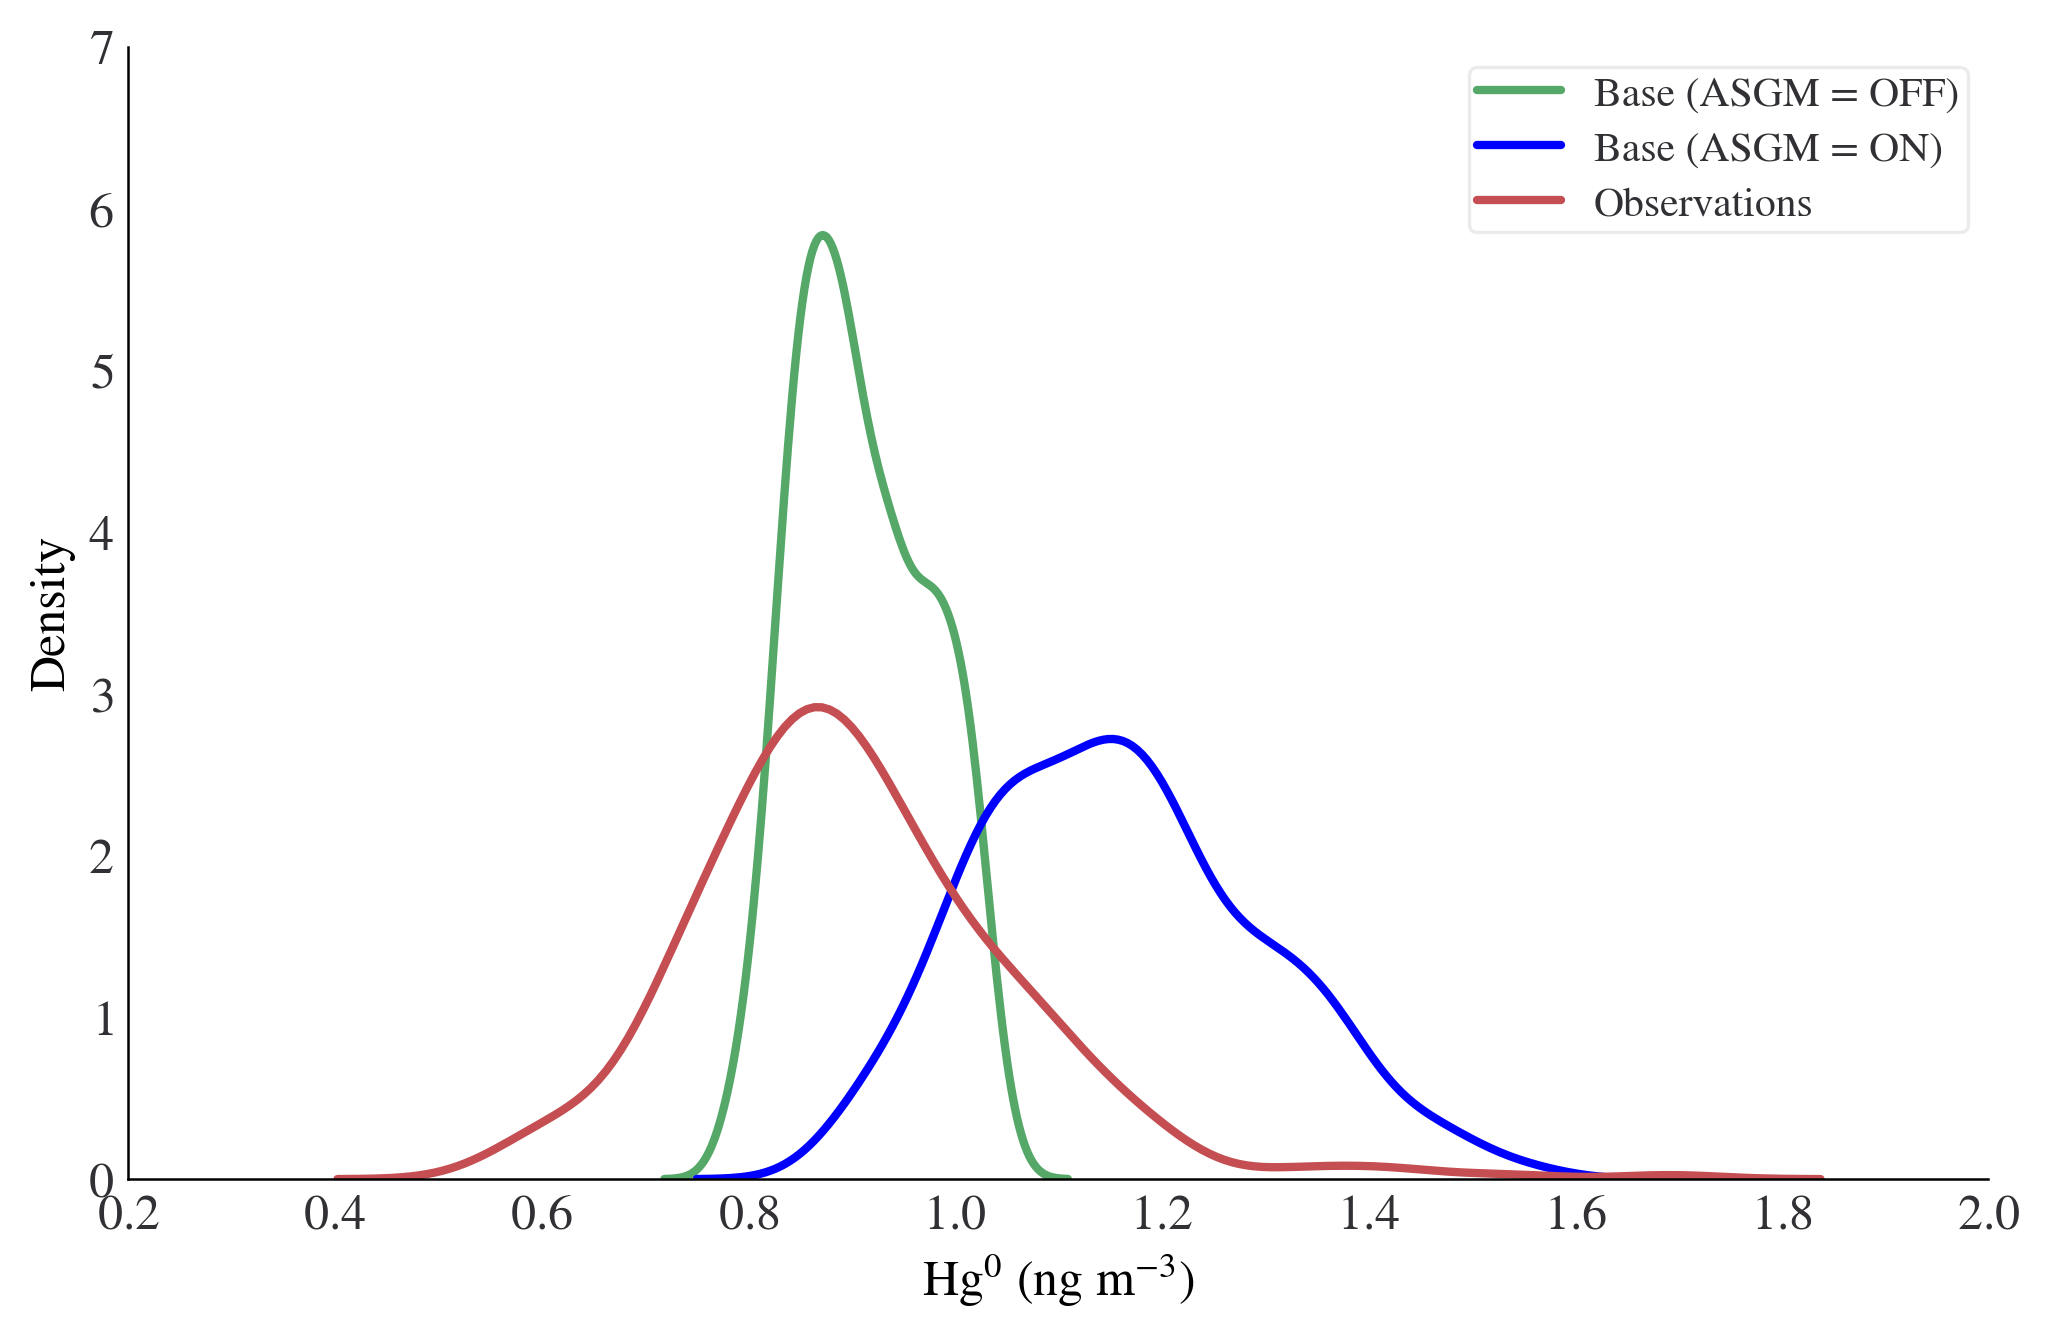

In [24]:

from matplotlib.ticker import ScalarFormatter,AutoMinorLocator
import matplotlib as mpl
fig, ax =plt.subplots(figsize=(8,5))
plt.style.use('/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/JPnotebooks/plot_style.txt')
#plt.title('Histograms of Predicted Hg Concentrations in \nGEOS-Chem vs Observed Concentration',size=12,fontweight="bold")

sns.kdeplot(data=GCno_asgm.SpeciesConc_Hg0,ax =ax, fill=False,color = 'g',label = 'Base (ASGM = OFF)')
sns.kdeplot(data=GC_asgmNC.SpeciesConc_Hg0,ax =ax, fill=False,color = 'blue',label = 'Base (ASGM = ON)')
sns.kdeplot(data=obsNC.value,ax =ax, fill=False,color = 'r',label = 'Observations')
plt.legend()
plt.xlabel('Hg$^0$ (ng m$^{-3}$)')
name='Histplot_obsVmodel_v1'
savepath='/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/figures/ModelvsObs/'+name+'.pdf'
fig.savefig(savepath,bbox_inches='tight')
plt.show()

## depreciated plots

In [26]:
df_comb_mod=pd.merge(GCno_asgm,GC_asgmNC,  left_index=True, right_index=True)
df_comb=pd.merge(df_comb_mod, obsNC, left_index=True, right_index=True)
df_comb.columns=['Base (ASGM = OFF)','Base (ASGM = ON)','Observations']
df_comb

,Base (ASGM = OFF),Base (ASGM = ON),Observations
time,,,
2014-07-03,0.911956,1.141870,0.644308
2014-07-04,0.907401,1.142869,0.651114
2014-07-05,0.887611,1.091087,0.617688
2014-07-06,0.841053,1.058690,0.579989
...,...,...,...
2015-06-29,0.836476,1.050984,0.859547
2015-06-30,0.841379,1.038522,0.849968
2015-07-01,0.859729,1.134310,1.048141
2015-07-02,0.889885,1.253862,0.895688


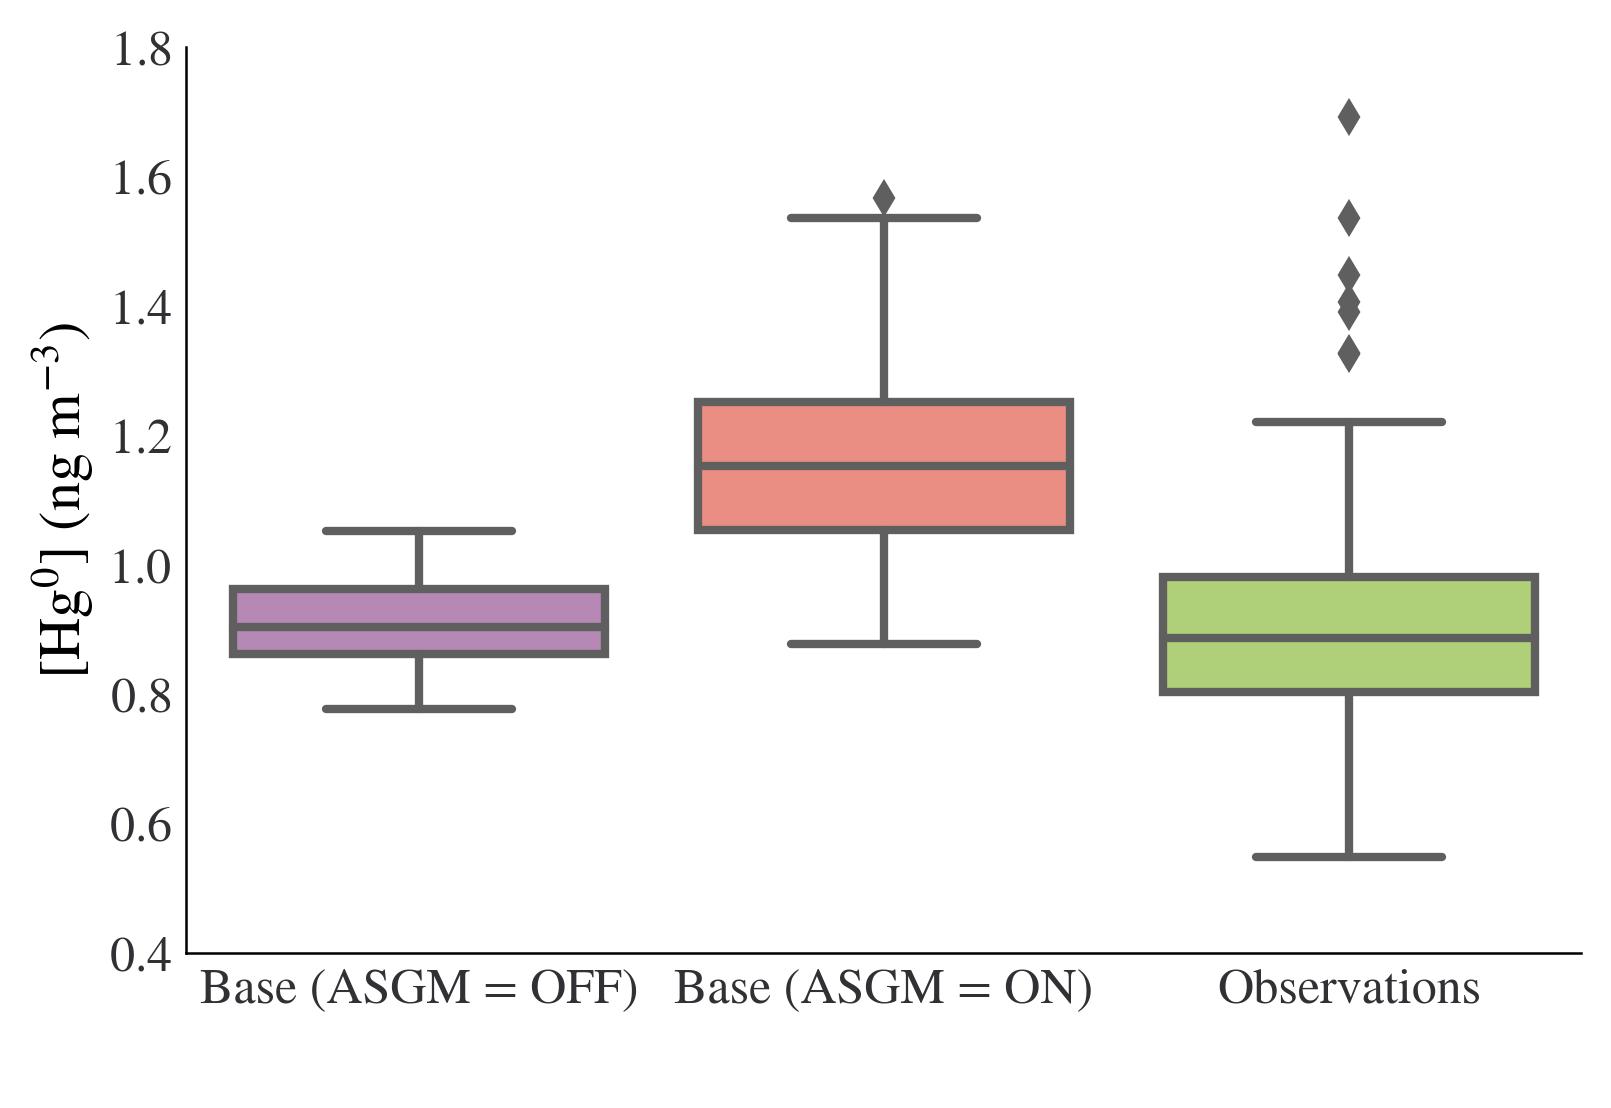

In [27]:
import seaborn as sns
# bplot = sns.boxplot(data=df_combined_noHR)
#boxes = ax.artists
colors={'GC_LoRes_NoASGM':'g','GC_LoRes_ASGM':'b','Observations':'r'}

clist=list(colors.keys())
df = pd.DataFrame(data=df_comb, columns=["Base (ASGM = OFF)", "Base (ASGM = ON)", "Observations"])
boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df))
#boxplot.axes.set_title("Distribution of Hg0 concentrations", fontsize=16)
boxplot.set_xlabel(" ", fontsize=14)
boxplot.set_ylabel("[Hg$^0$] (ng m$^{-3}$)", fontsize=14)
plt.show()

## Standardizing Data

In [28]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler() 
# GC_noasgm_st = scaler.fit_transform(GCno_asgm)
# GC_asgm_st = scaler.fit_transform(GC_asgmNC)
# obsNC_st = scaler.fit_transform(obsNC)

## Standardized Histplot

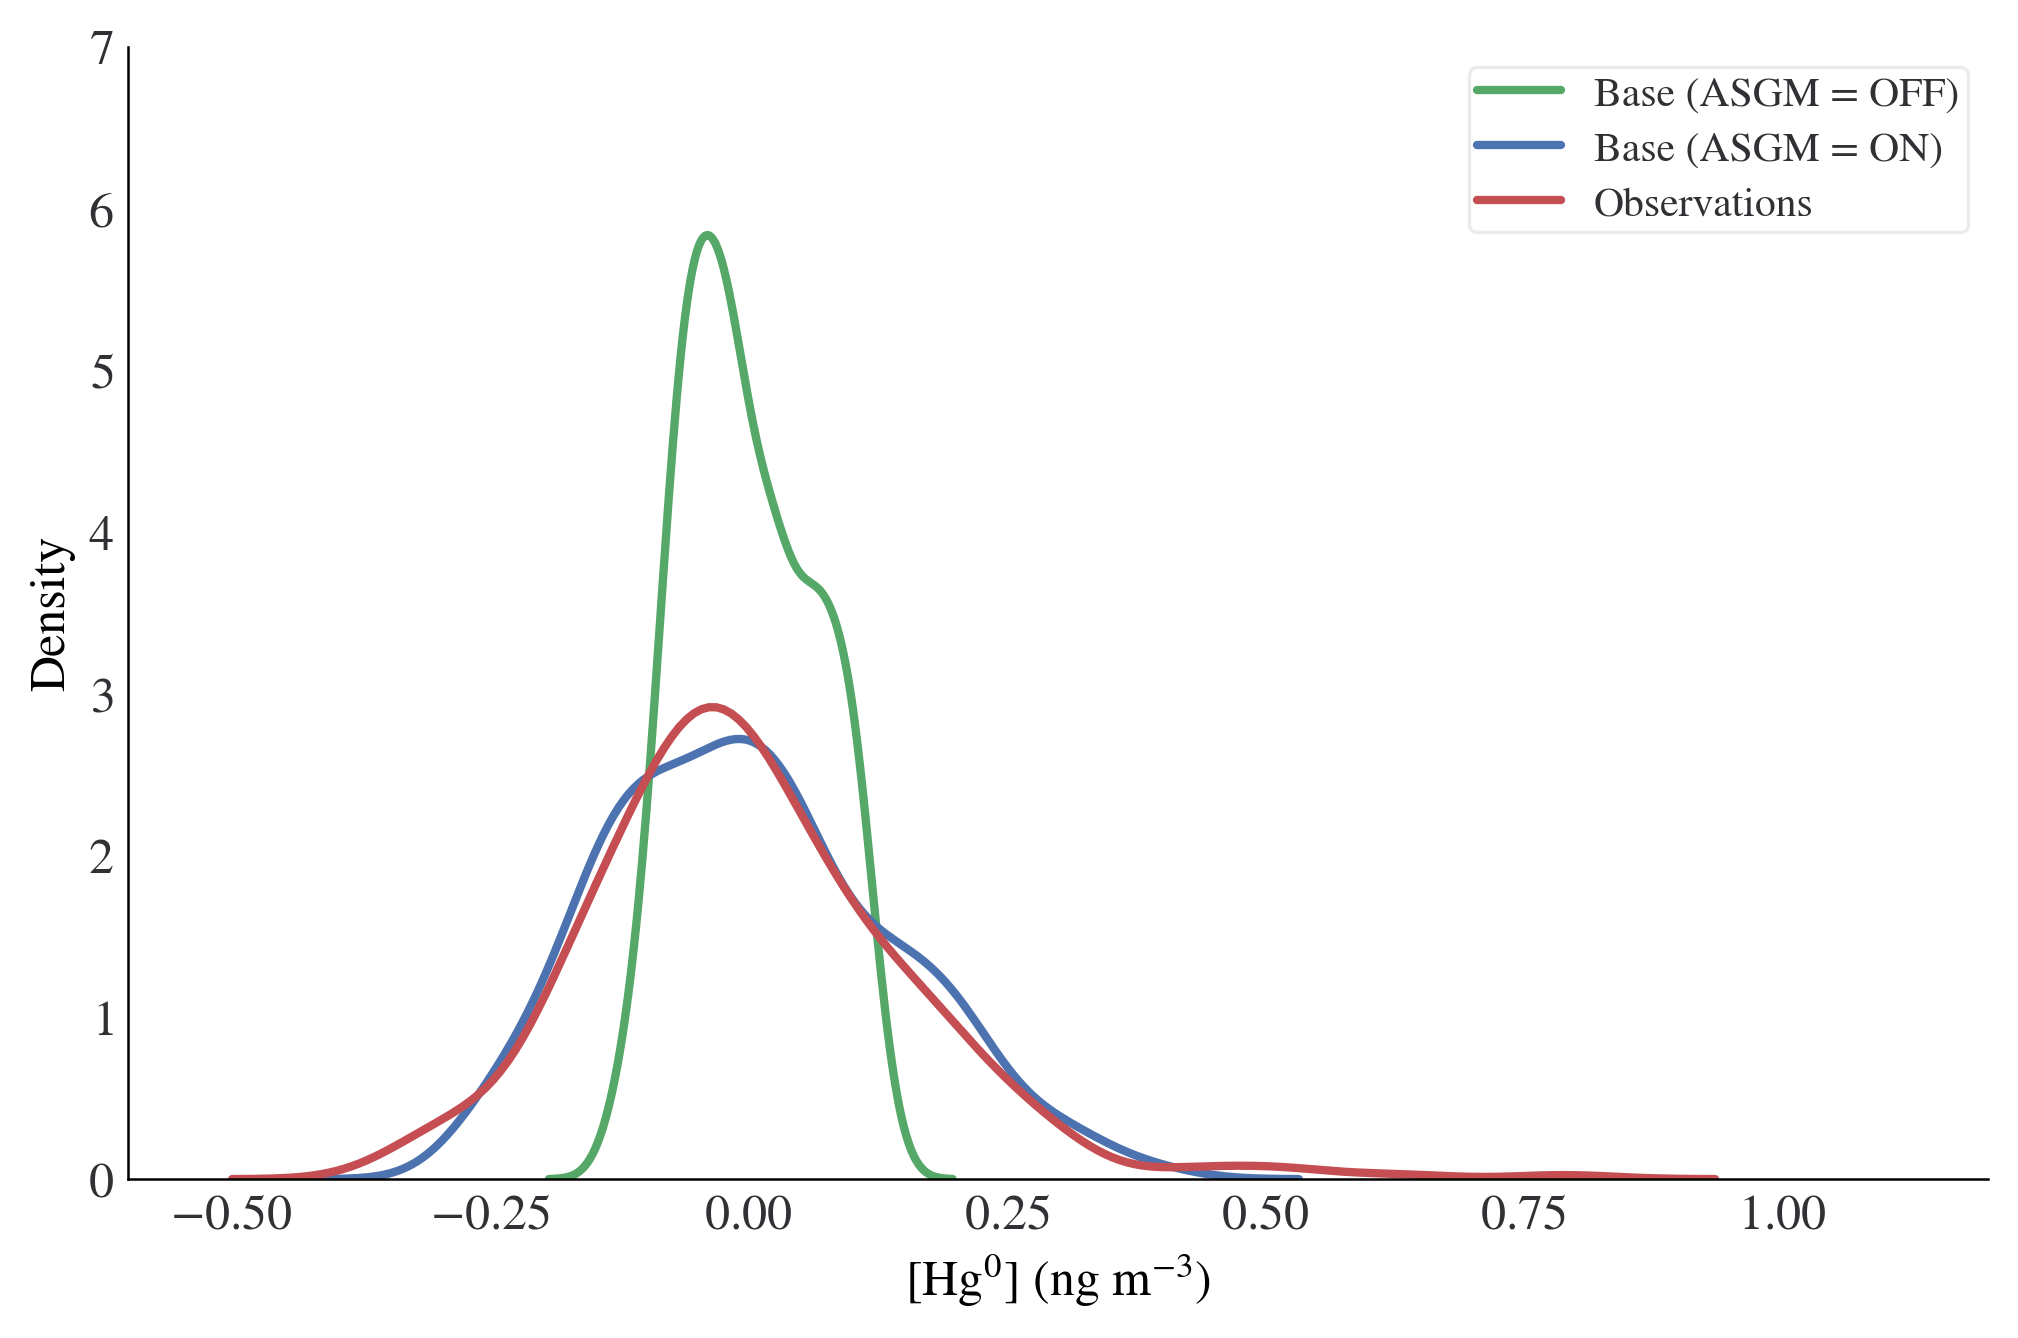

In [29]:
fig, ax = plt.subplots(figsize=(8,5))
#plt.figure(figsize=(8,5))
#plt.title('Standardized Predicted Hg Concentrations when ASGM Emissions are \nTurned Off vs when Turned On in GEOS-Chem',size=12,fontweight="bold")

sns.kdeplot(data=df_nc_standardized['Base (ASGM = OFF)'],ax =ax,color = 'g', fill=False,label = 'Base (ASGM = OFF)')
sns.kdeplot(data=df_nc_standardized['Base (ASGM = ON)'],ax =ax,color = 'b', fill=False,label ='Base (ASGM = ON)')
sns.kdeplot(data=df_nc_standardized['Observations'],ax =ax,color = 'r', fill=False,label = 'Observations')
plt.legend()
plt.xlabel('[Hg$^0$] (ng m$^{-3}$)')
name='Histplot_std_obsVmodel_v1'
savepath='/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/figures/ModelvsObs/'+name+'.pdf'
fig.savefig(savepath,bbox_inches='tight')#,bbox_extra_artists=(lgd,), bbox_inches='tight'
plt.show()

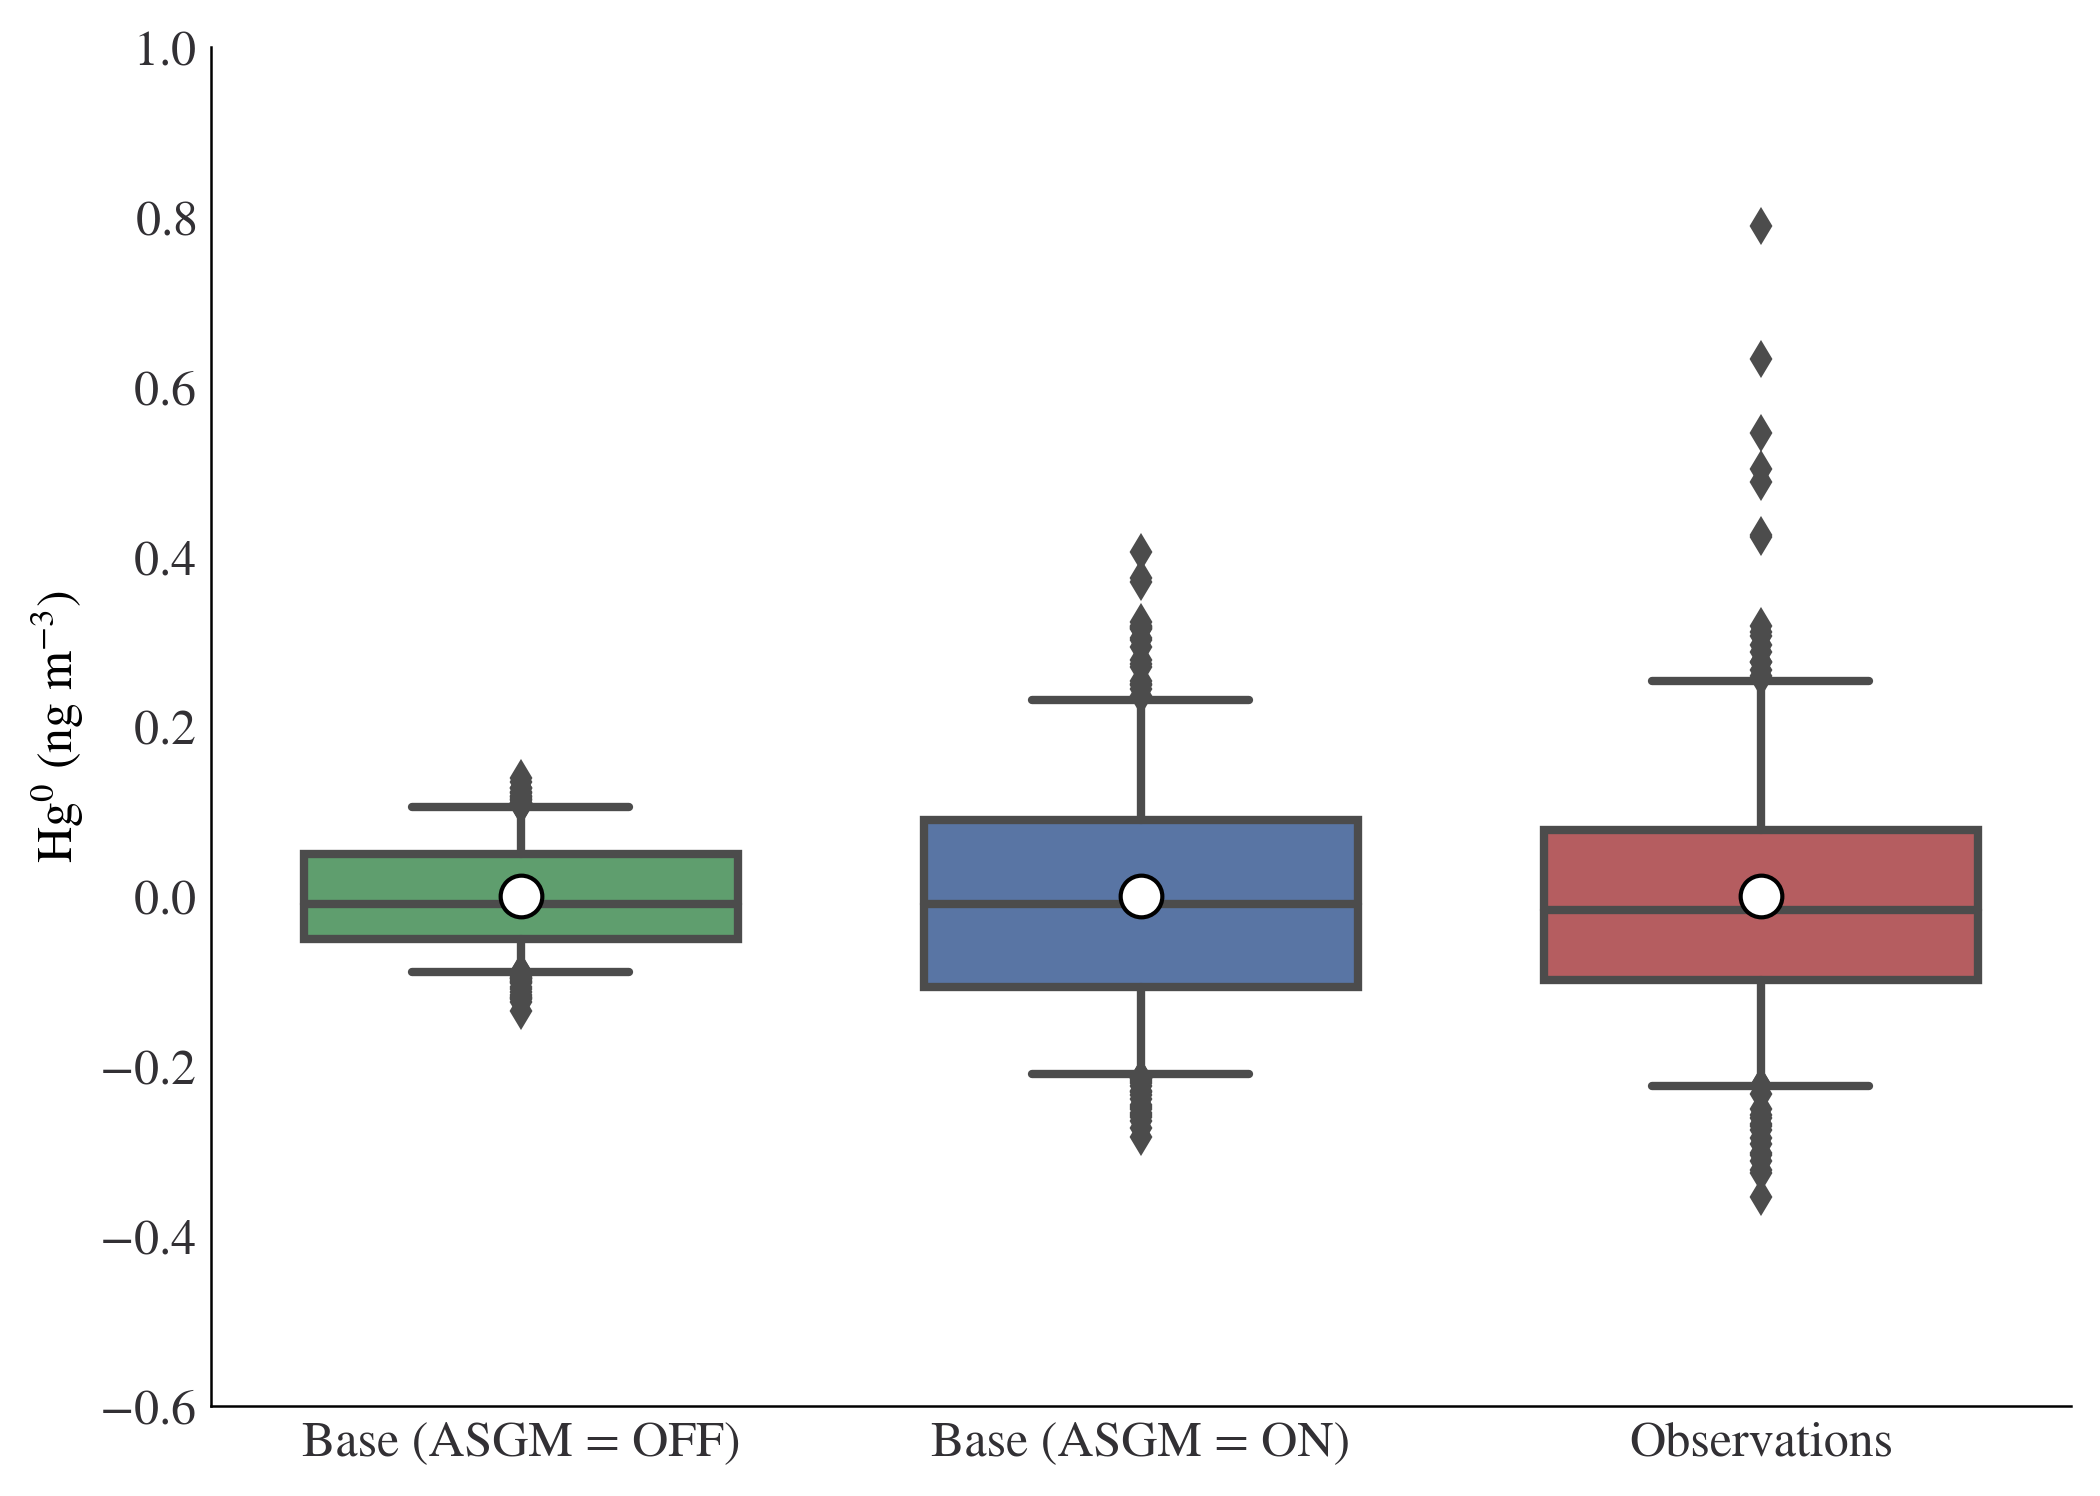

In [31]:
fig, ax = plt.subplots(figsize=(8,6))
name='Boxplot_std_obsVmodel_v1'

sns.boxplot(data=df_nc_standardized,showmeans=True,

            meanprops={"marker":"o",

                       "markerfacecolor":"white",

                       "markeredgecolor":"black",

                      "markersize":"10"}, width=0.7,whis=[5, 95],palette=colors)#notch=True, ) # df[['p1_satisfaction','p2_satisfaction','p3_satisfaction']]
#sns.swarmplot(data=df_all, color=".25")
plt.ylabel('Hg$^0$ (ng m$^{-3}$)')
savepath='/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/figures/ModelvsObs/'+name+'.pdf'
fig.savefig(savepath,bbox_inches='tight')#,bbox_extra_artists=(lgd,), bbox_inches='tight'
# Titles and labels
# plt.title("Comparison of Standardized Model Runs with Standardized Observations", fontsize=16)
plt.show()

# Find Correlation

In [50]:
dfNC=df_normal_conditions
dfNC.dropna(inplace=True)
dfNC.describe()

In [66]:
def myscater(x,y,xname,yname,tit,ax,my_stats):
    pearson,r_squared,spearman=my_stats
    style = dict(size=10, color='gray')

    lineStart =0 
    lineEnd = x.max() +0.1

    #asign colors
    if ax ==2:
        col='purple'
        axes[ax,1].set_title(tit)
        axes[ax,0].set_title('Observed vs Modelled Hg Concentrations at CHC')
        statxloc=1.3
        rsyloc=0.8
        ryloc= 0.7
        r2yloc=0.6
    elif ax ==1:
        col=plot_colors['Base (ASGM = ON)']
        statxloc=1.3
        rsyloc=0.8
        ryloc= 0.7
        r2yloc=0.6
    elif ax==0:
        col=plot_colors['Base (ASGM = OFF)']
        statxloc=1
        rsyloc=1.6
        ryloc= 1.5
        r2yloc=1.4
   
    tseries_line=axes[ax,0].plot(y,color = col,label=yname)
    tseries_obs=axes[ax,0].plot(x,color = plot_colors['Observations'],label='Observations')

    axes[ax,0].set_ylabel('Hg$^0$ (ng m$^{-3}$)')
    axes[ax,0].set_xlabel('')

    #scatter
    dot=axes[ax,1].scatter(x, y, color = 'k', alpha=0.5,label='Hg$^0$')
    one21= axes[ax,1].plot([lineStart, lineEnd], [lineStart, lineEnd],'r--',label='1 to 1 line')
    axes[ax,1].text(statxloc, ryloc, f'$r$ = {pearson}', **style)
    axes[ax,1].text(statxloc, r2yloc, f'$R^2$ = {r_squared}', **style)
    axes[ax,1].text(statxloc, rsyloc, f'$r_s$ = {spearman}', **style)
    axes[ax,1].set_xlim(0, lineEnd)
    axes[ax,1].set_ylim(0, lineEnd)
    axes[ax,1].set_ylabel(yname)
    if ax==1:
        axes[ax,1].set_xlabel(xname)
        axes[ax,0].set_xlabel('Time')
    return tseries_line,tseries_obs,dot,one21


Base (ASGM = OFF)

Pearsons correlation:0.1435 and the R-squared value is: 0.020601

The spearman orrelation between Base (ASGM = OFF) and observations is: 0.1737  and the Ttest is :-1.2 and the p-value is :0.2289161719225206


Base (ASGM = ON)

Pearsons correlation:0.1042 and the R-squared value is: 0.010862

The spearman orrelation between Base (ASGM = ON) and observations is: 0.1339  and the Ttest is :-22.69 and the p-value is :9.356822067179048e-85



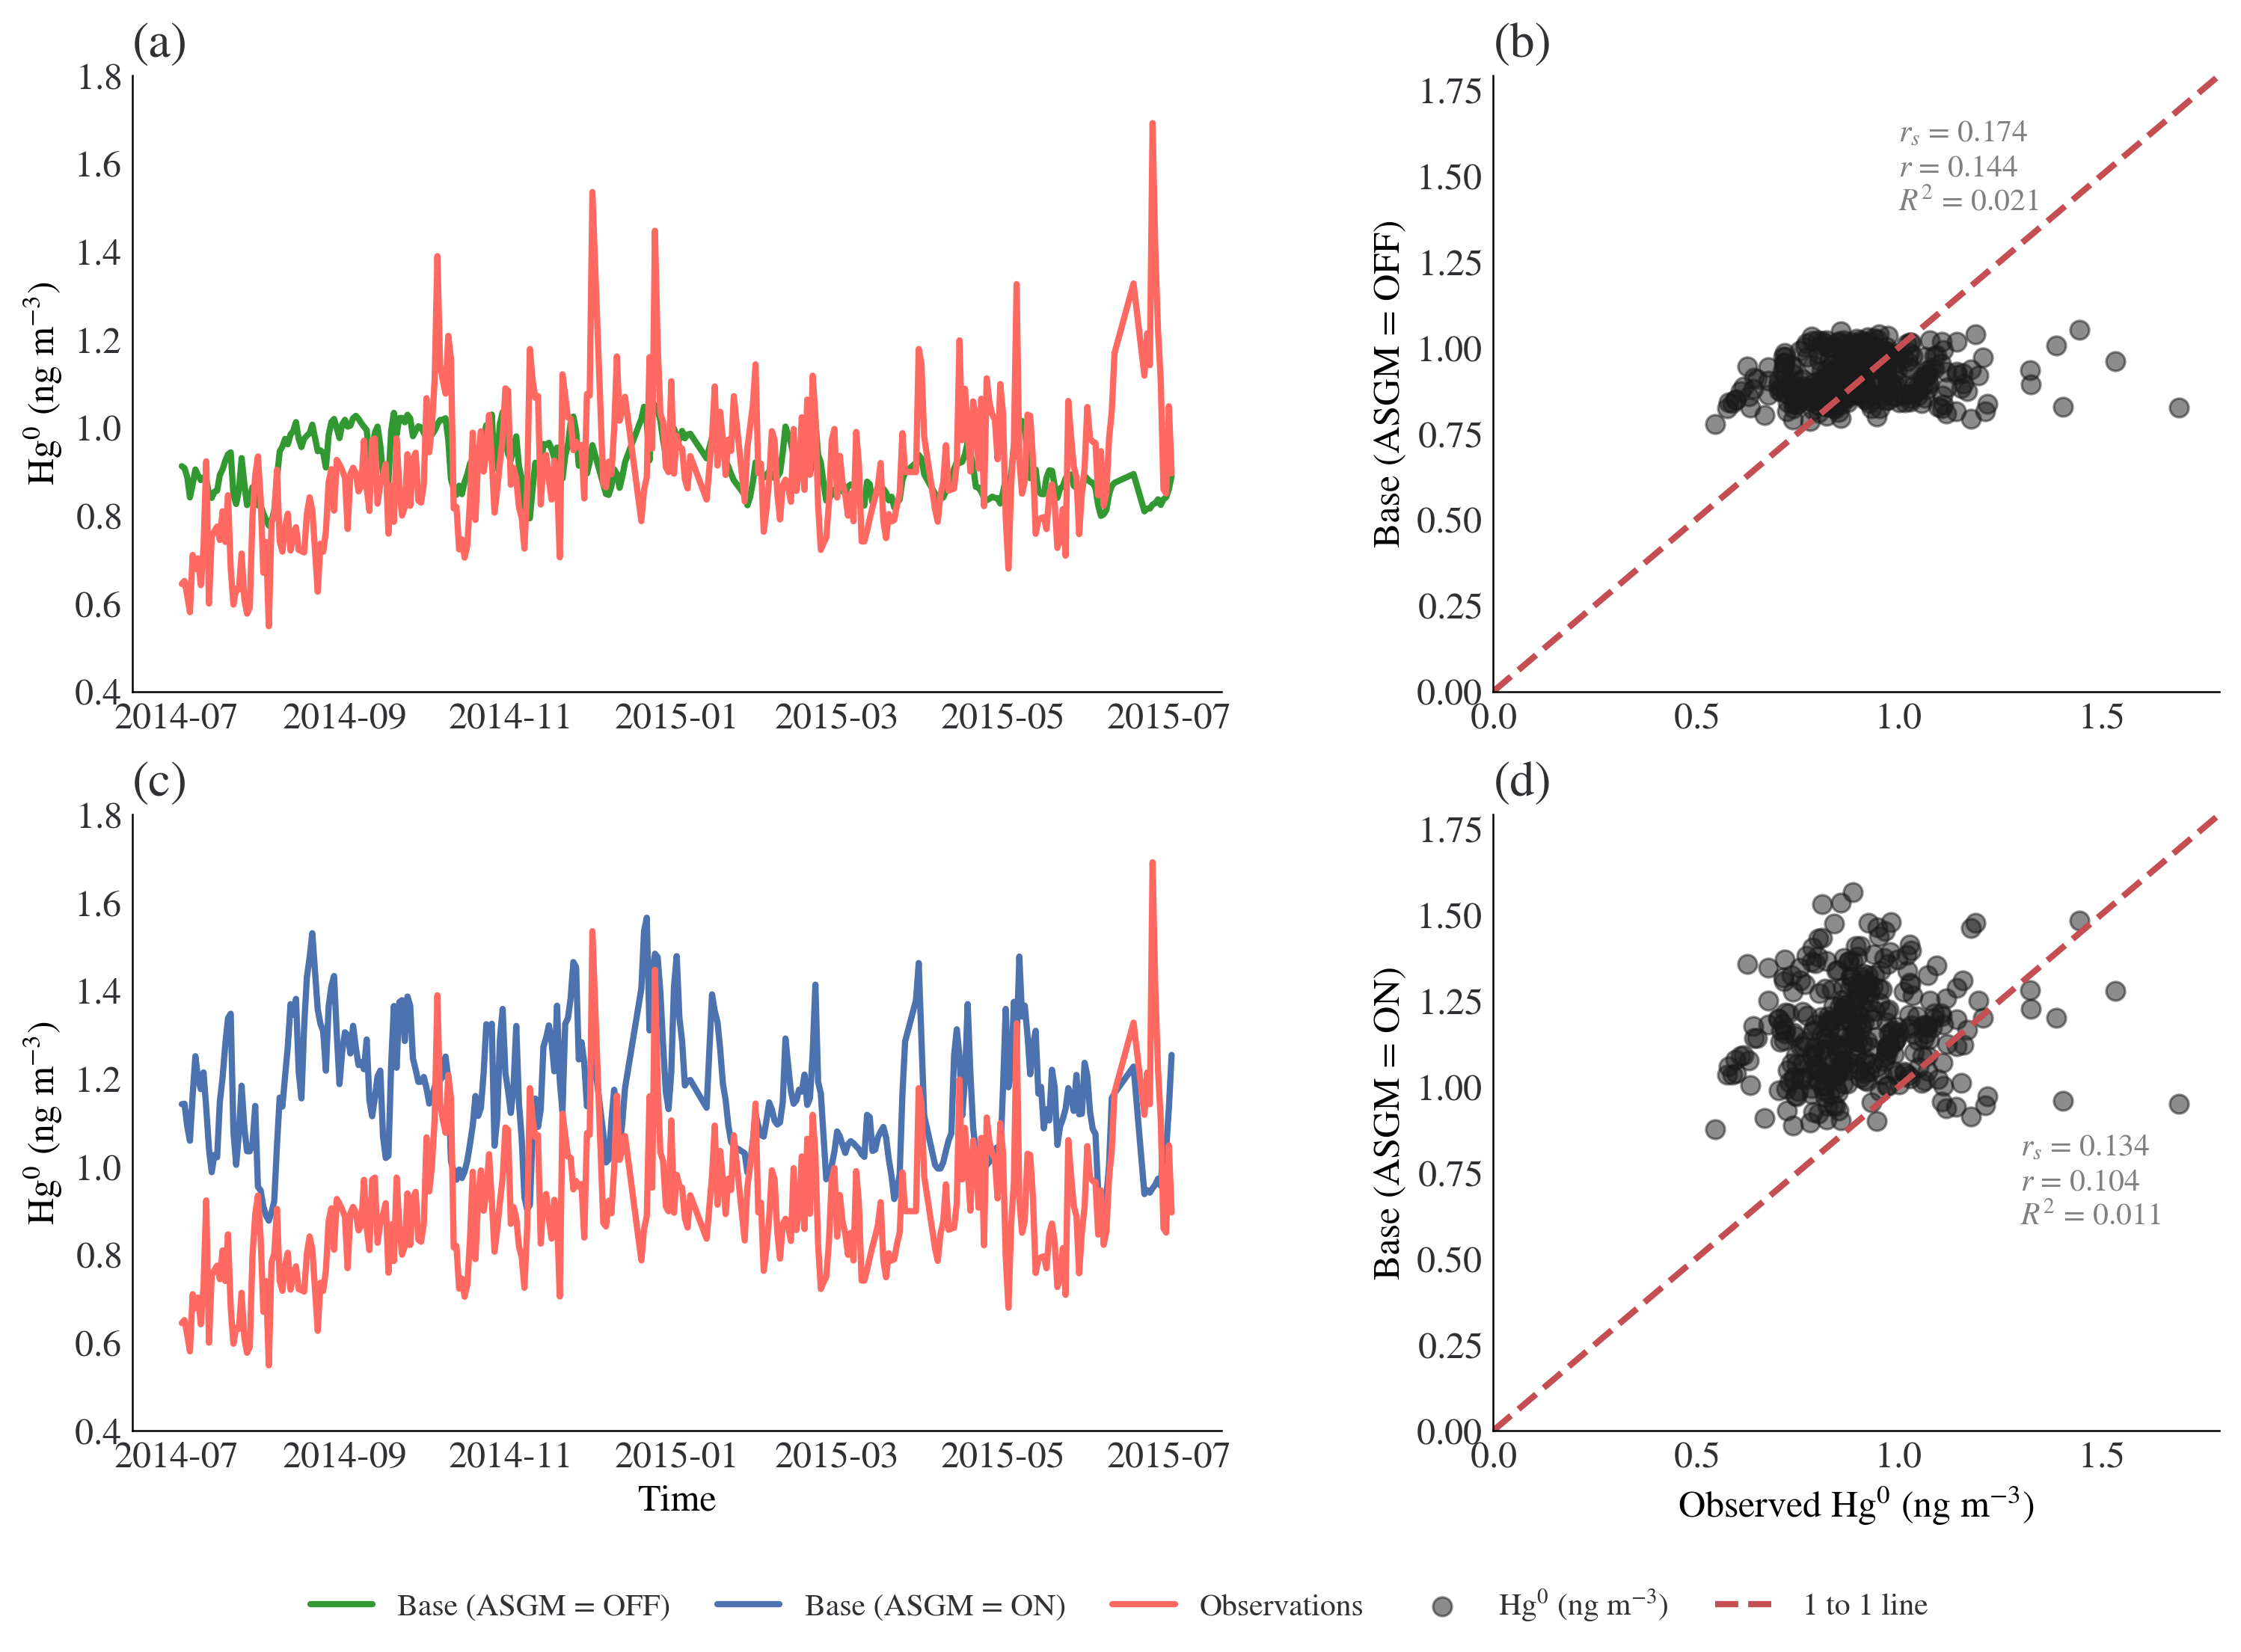

In [79]:
from scipy import stats
from sklearn.metrics import r2_score 
models=['Base (ASGM = OFF)','Base (ASGM = ON)'] #','LoRes_Base_No ASGM']
obs_d='Observations'
df_0NA=dfNC #.dropna()
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(12,8),gridspec_kw={'width_ratios':[3, 2],'wspace':0.3,'hspace':0.2})
axes[0,0].set_title('(a)')
axes[0,1].set_title('(b)')
axes[1,0].set_title('(c)')
axes[1,1].set_title('(d)')
i=0
leglabels={}
for mod in models:
    print('\n'+mod+'\n')
    tit= 'Hg$^0$ concentrations (ng m$^{-3}$) at CHC'
    xname='Observed Hg$^0$ (ng m$^{-3}$)'
    yname=mod.replace('_',' ')
    
    # calculate Pearson's correlation
    corr_p, _ = stats.pearsonr(df_0NA[obs_d],df_0NA[mod])
    print(f'Pearsons correlation:{round(corr_p,4)} and the R-squared value is: {round(corr_p**2,6)}\n')
    # Perform the two sample t-test with equal variances
    t_test=stats.ttest_ind(a=df_0NA[obs_d], b=df_0NA[mod], equal_var=True)
    
    corr_s=stats.spearmanr(df_0NA[obs_d], df_0NA[mod])
    print(f"The spearman orrelation between {mod} and observations is: {round(corr_s[0],4)}  and the Ttest is :{round(t_test[0],2)} and the p-value is :{t_test[1]}\n")#The R-squared Value of {mod} is: {R_square} \
    my_stats=["{:.3}".format(corr_p),"{:.2}".format(corr_p**2), "{:.3}".format(corr_s[0])]
    
    
    
    tseries_line,tseries_obs,dot,one21=myscater(df_0NA[obs_d],df_0NA[mod],xname,yname,tit,i,my_stats)
    leglabels[i]={'tseries_line':tseries_line,'tseries_obs':tseries_obs,'dot':dot,'one21':one21}
    i+=1

lines = []
labels = []
  
for ax in fig.axes:
    Line, Label = ax.get_legend_handles_labels()
    # print(Label)
    lines.extend(Line)
    labels.extend(Label)

from collections import OrderedDict
by_label = OrderedDict(zip(labels, lines))
#odict_keys(['Base (ASGM = OFF) model', 'Observations', 'Hg$^0$', '1 to 1 line', 'Base (ASGM = ON) model'])
ulines=[by_label['Base (ASGM = OFF)'],
by_label['Base (ASGM = ON)'],
by_label['Observations'],
by_label['Hg$^0$'],
by_label['1 to 1 line']]
ulabels=['Base (ASGM = OFF)',
        'Base (ASGM = ON)',
         'Observations',
         'Hg$^0$ (ng m$^{-3}$)',
         '1 to 1 line']
fig.legend(ulines, ulabels, frameon=False, bbox_to_anchor=(0.8, 0.05),ncol=6)
name='TimeSeriesNsactter_obsVmodel_v1.pdf'
savepath='/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/figures/ModelvsObs/'+name
fig.savefig(savepath,bbox_inches='tight')
plt.show()